# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from HANKStickyModel import HANKStickyModelClass

# Solve the model

In [2]:
model = HANKStickyModelClass(name='baseline')

In [3]:
par = model.par
ss = model.ss
path = model.path
sim = model.sim

In [4]:
model.find_ss(do_print=True)

Find optimal beta for market clearing
final evaluation
household problem in ss solved in 3.0 secs [267 iterations]
household problem in ss simulated in 0.8 secs [269 iterations]
steady state found in 48.6 secs
 beta   = 0.9838
 nu     = 0.9085
Discrepancy in A =   0.00000000
Discrepancy in L =   0.00000000
Discrepancy in Y =  -0.00000000


In [5]:
# beta_range = np.linspace(0.95,1.0,5)
# res = {}
# for b in beta_range:
#     model = HANKnoStickyModelClass(name='baseline')
#     model.par.beta_mean = b
#     try:
#         model.find_ss(do_print=True)
#     except:
#         res[str(b)] = model.ss.clearing_Y
# res

# Testing

note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 4.3 secs
household problem simulated along transition in 2.7 secs



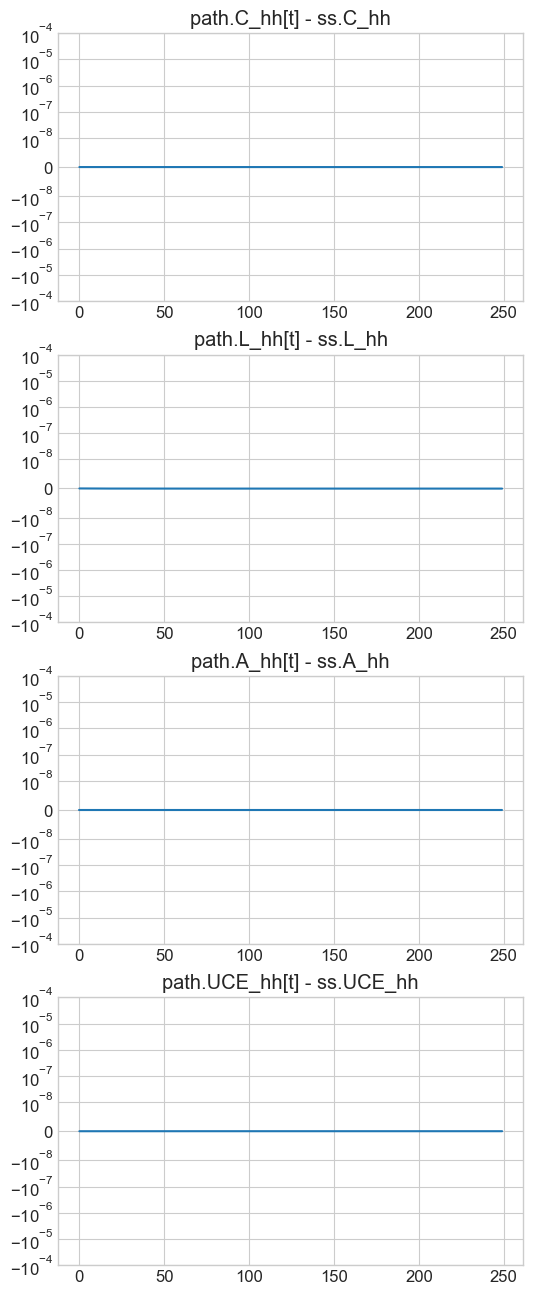

In [6]:
model.test_hh_path()

In [7]:
model.test_path()

note: inputs = steady state value -> expected: no difference to steady state and zero errors

difference to value at steady state:
A              : t0 = -1.3e-09, max abs.  1.3e-09
B              : t0 =  0.0e+00, max abs.  6.9e-17
clearing_A     : t0 = -4.4e-15, max abs.  4.4e-15
clearing_L     : t0 = -1.3e-09, max abs.  1.3e-09
clearing_Y     : t0 = -9.3e-12, max abs.  9.3e-12
clearing_Y     : t0 = -9.3e-12, max abs.  9.3e-12
clearing_fund_start: t0 =  0.0e+00, max abs.  0.0e+00
clearing_fund_end: t0 =  0.0e+00, max abs.  0.0e+00
Div_int        : t0 =  0.0e+00, max abs.  2.2e-16
Div_k          : t0 =  0.0e+00, max abs.  5.6e-17
Div            : t0 =  0.0e+00, max abs.  2.2e-16
eg             : t0 =  0.0e+00, max abs.  0.0e+00
em             : t0 =  0.0e+00, max abs.  0.0e+00
G              : t0 =  0.0e+00, max abs.  0.0e+00
i              : t0 =  0.0e+00, max abs.  2.9e-14
I              : t0 =  0.0e+00, max abs.  0.0e+00
Ip             : t0 =  0.0e+00, max abs.  0.0e+00
K            

# Find transition path

In [8]:
model.compute_jacs(do_print=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for Z               in 4.3 secs
curly_Y and curly_D calculated for ra              in 4.3 secs
curly_Y and curly_D calculated for rl              in 4.3 secs
curly_E calculated in 5.2 secs
builiding blocks combined in 0.8 secs
household Jacobian computed in 18.9 secs

full Jacobians:
full Jacobian to unknowns computed in 1.9 secs [in evaluate_path(): 0.3 secs]
full Jacobian to shocks computed in 1.3 secs [in evaluate_path(): 0.2 secs]


In [9]:
# model.test_jacs(s_list=[0,50])

In [10]:
model.find_transition_path(do_print=True, do_print_unknowns=True)

finding the transition path:
 it =   0 -> max. abs. error = 3.04e-04
   r              : minval =   0.012 meanval =   0.012 maxval =   0.012
   w              : minval =   0.840 meanval =   0.840 maxval =   0.840
   Y              : minval =   1.000 meanval =   1.000 maxval =   1.000
   Ip             : minval =   0.118 meanval =   0.118 maxval =   0.118
   Q              : minval =   1.000 meanval =   1.000 maxval =   1.000
   3.04e-04 in fisher_res
   2.18e-11 in w_res
   9.30e-12 in clearing_Y
   0.00e+00 in invest_res
   0.00e+00 in valuation_res
 it =   1 -> max. abs. error = 6.94e-06
   r              : minval =   0.012 meanval =   0.012 maxval =   0.013
   w              : minval =   0.840 meanval =   0.840 maxval =   0.840
   Y              : minval =   0.999 meanval =   1.000 maxval =   1.000
   Ip             : minval =   0.118 meanval =   0.118 maxval =   0.118
   Q              : minval =   0.999 meanval =   1.000 maxval =   1.000
   9.30e-08 in fisher_res
   3.86e-07 in w_

In [11]:
model.find_IRFs(do_print=True)

linear transition path found in 0.1 secs [finding solution matrix: 0.0 secs]


In [12]:
paths = ['G','Y','C_hh','K','I',
         'N','w','tau','Pi','Pi_w','i','s','s_w','Z',
         'L_hh','A_hh',
         'rk','r','ra','rl',
         'q','B',
         'p_eq','Div','p_int','Div_int','p_k','Div_k', 'clearing_Y']
lvl_value = ['eg', 'em', 'i', 'Pi', 'Pi_w','clearing_Y']
abs_diff = ['r', 'ra', 'rl', 'i']
facs = {'r':100,'ra':100,'rl':100}

### shocks ###


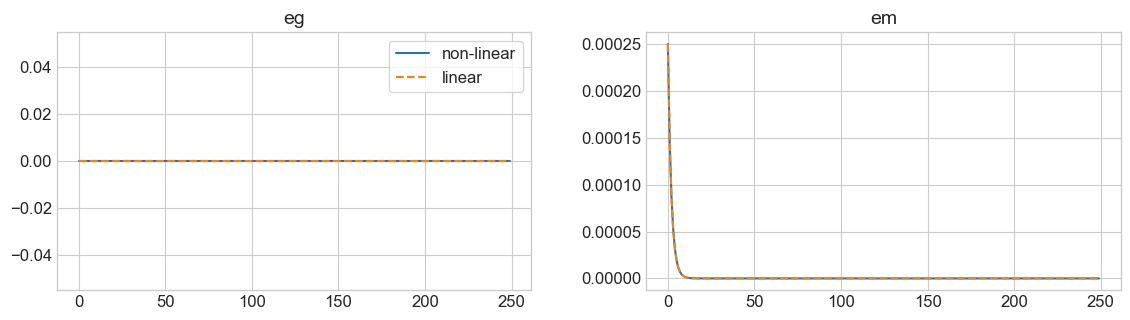


### varnames ###


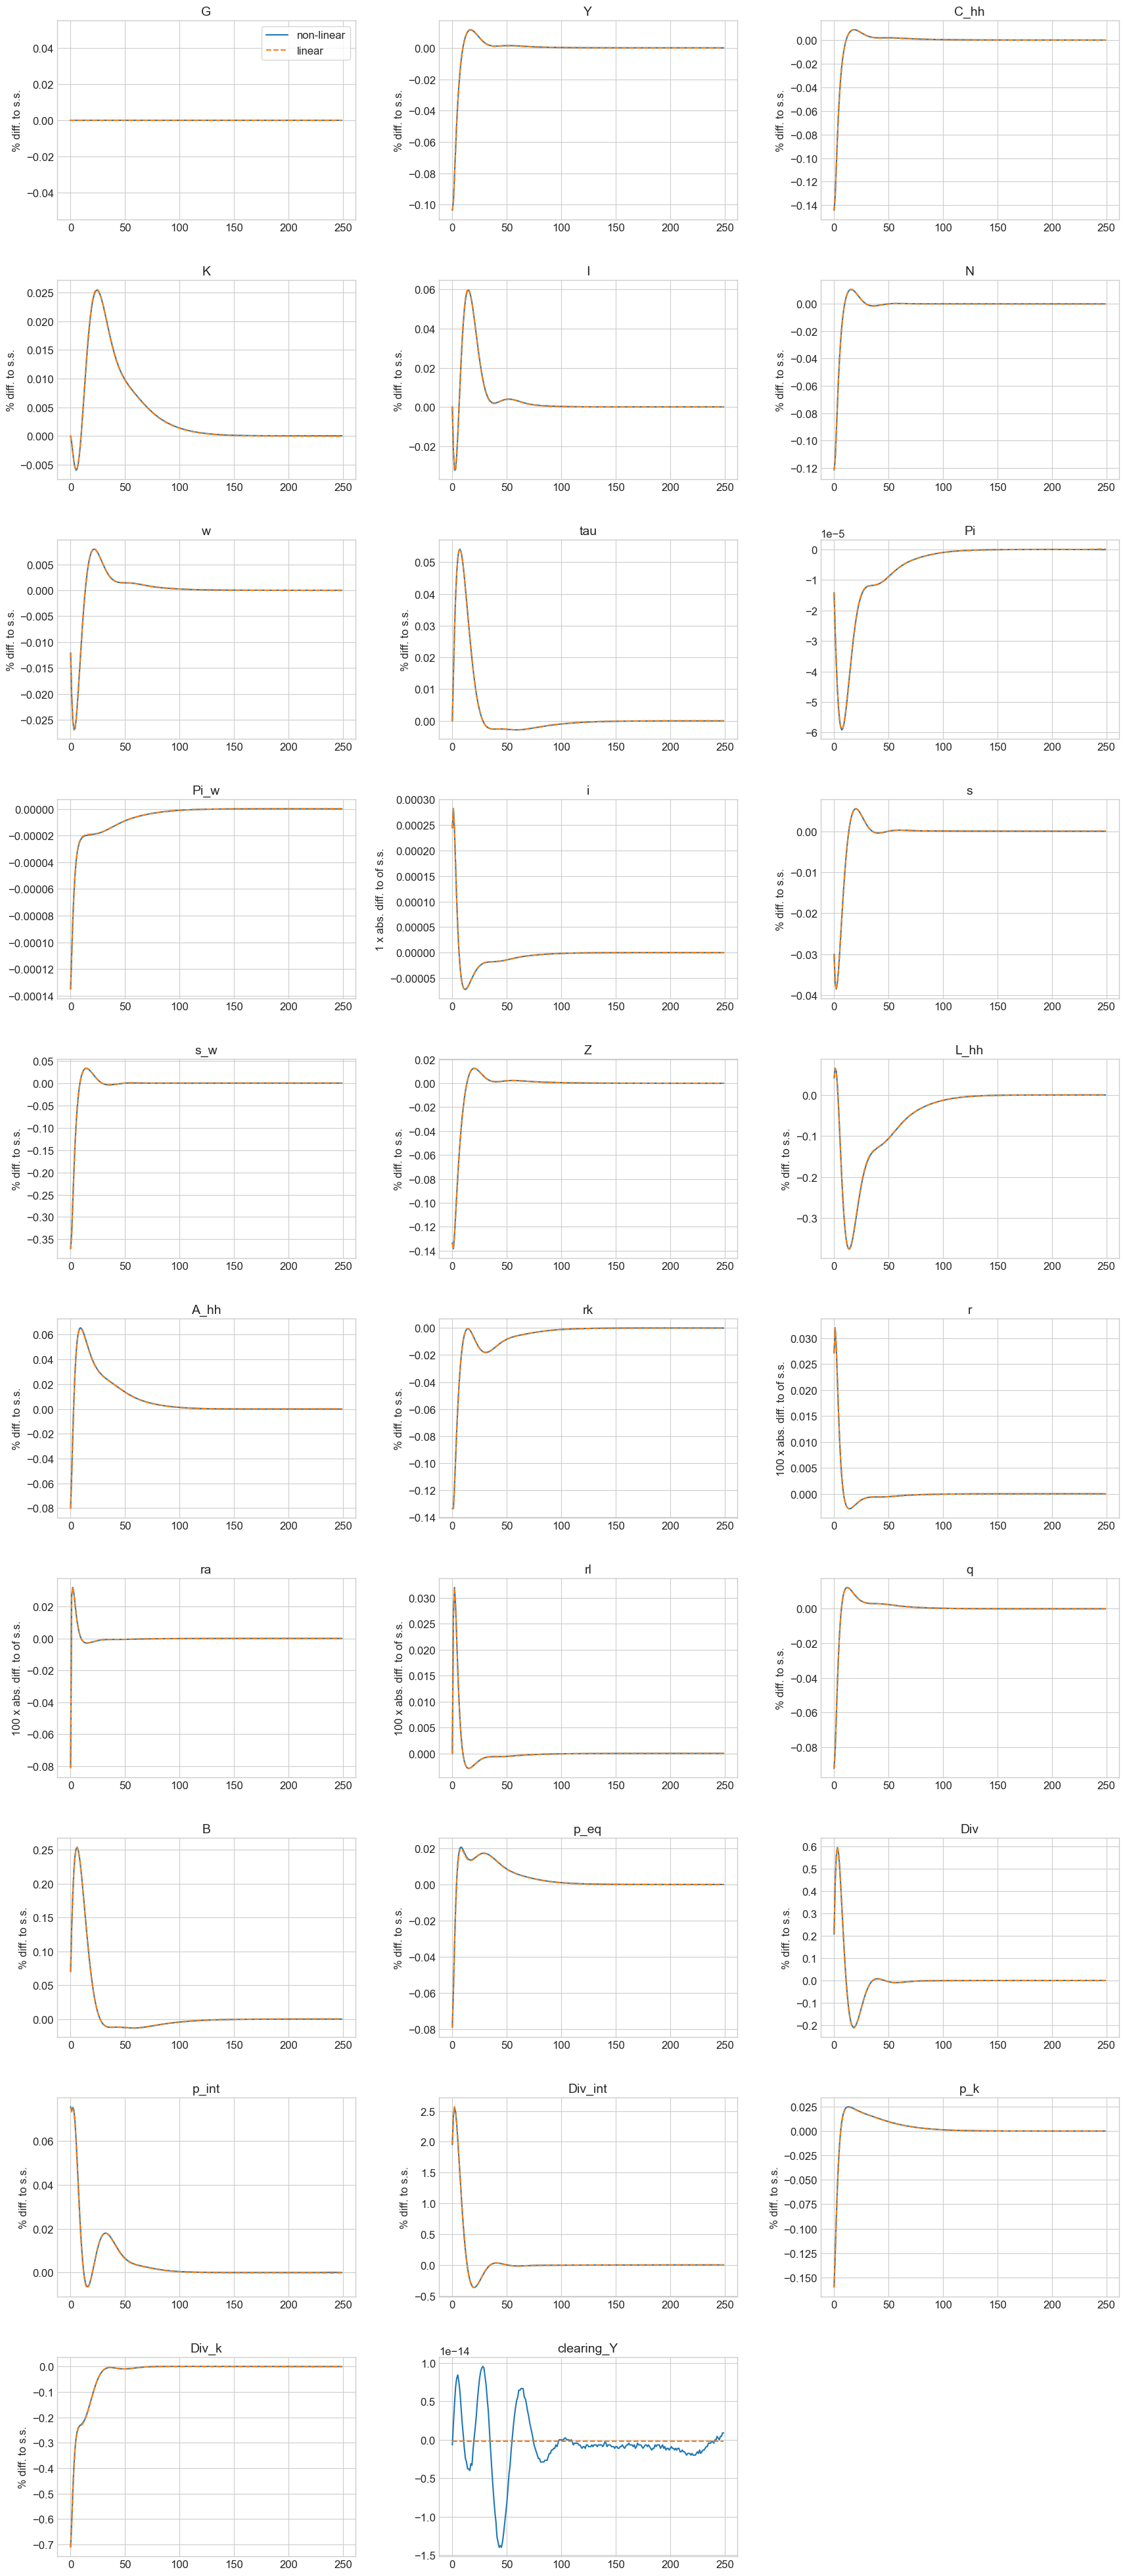


### tagets ###


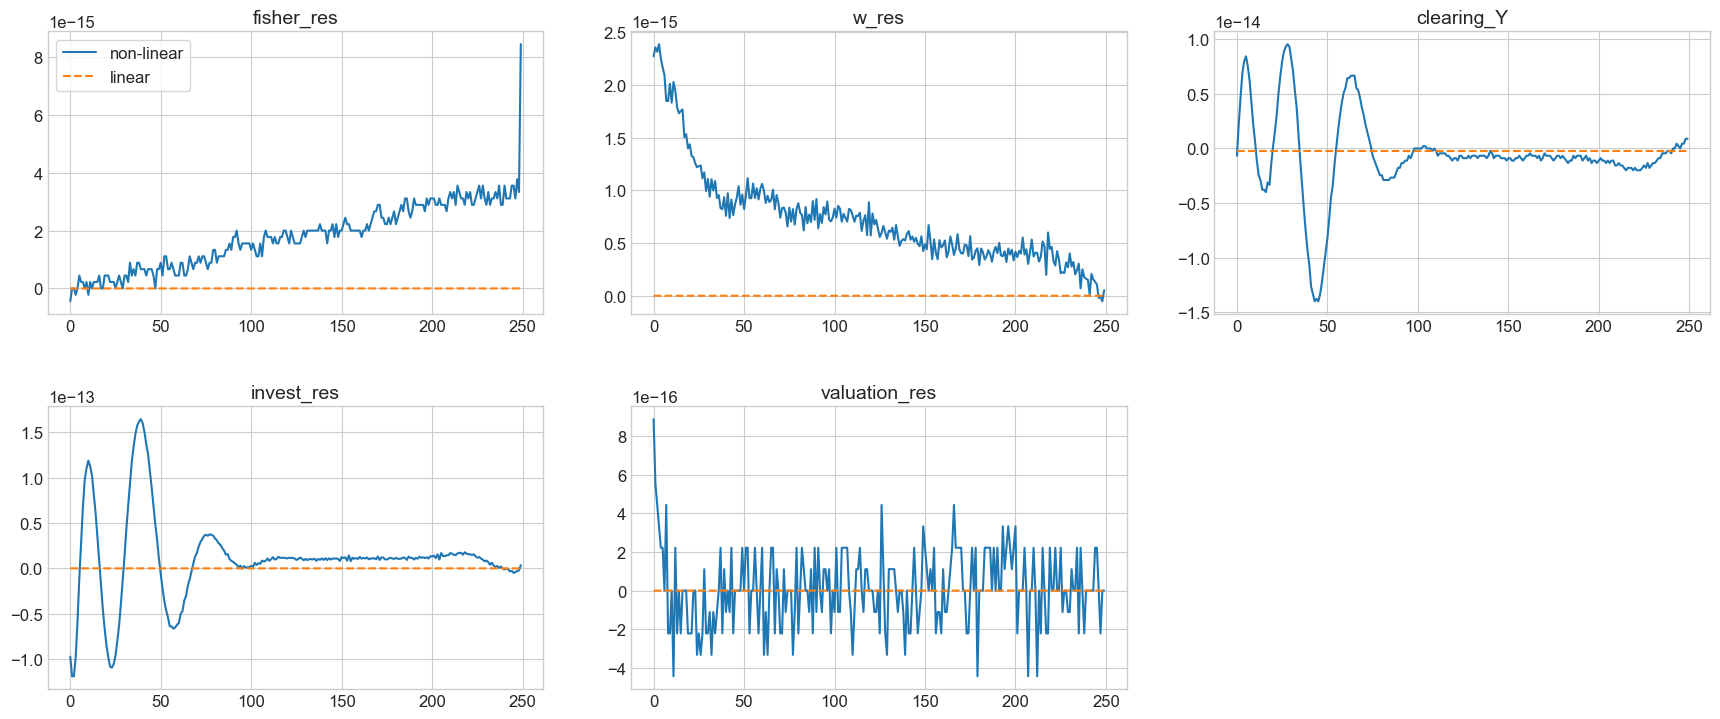

In [13]:
model.show_IRFs(paths,lvl_value=lvl_value,abs_diff=abs_diff,facs=facs,ncols=3,T_max=par.T,do_linear=True,do_shocks=True)

# Misc

In [14]:
model.print_unpack_varlist()

    for ncol in range(ncols):

        # unpack
        A = path.A[ncol,:]
        B = path.B[ncol,:]
        clearing_A = path.clearing_A[ncol,:]
        clearing_L = path.clearing_L[ncol,:]
        clearing_Y = path.clearing_Y[ncol,:]
        clearing_Y = path.clearing_Y[ncol,:]
        clearing_fund_start = path.clearing_fund_start[ncol,:]
        clearing_fund_end = path.clearing_fund_end[ncol,:]
        Div_int = path.Div_int[ncol,:]
        Div_k = path.Div_k[ncol,:]
        Div = path.Div[ncol,:]
        eg = path.eg[ncol,:]
        em = path.em[ncol,:]
        fisher_res = path.fisher_res[ncol,:]
        G = path.G[ncol,:]
        i = path.i[ncol,:]
        I = path.I[ncol,:]
        invest_res = path.invest_res[ncol,:]
        Ip = path.Ip[ncol,:]
        K = path.K[ncol,:]
        L = path.L[ncol,:]
        N = path.N[ncol,:]
        p_eq = path.p_eq[ncol,:]
        p_int = path.p_int[ncol,:]
        p_k = path.p_k[ncol,:]
        p_share = path.p_share[ncol,:]
        Pi_inc

In [15]:
np.allclose(path.ra[0,1:]-path.r[0,:-1],0.0)

True

In [16]:
path.D[1].sum(axis=(0,1,3))

array([6.26787538e-01, 4.47240918e-02, 7.58448660e-02, 3.59262934e-02,
       5.01328659e-03, 4.43100460e-03, 3.95028159e-03, 3.64904093e-03,
       3.46876290e-03, 3.52447095e-03, 4.28944754e-03, 5.64760313e-03,
       3.28402459e-03, 2.72045798e-03, 2.64622375e-03, 2.68804815e-03,
       3.30044162e-03, 5.04801482e-03, 3.59830707e-03, 2.49864493e-03,
       2.50643110e-03, 3.65045195e-03, 4.60819758e-03, 2.98138664e-03,
       2.50097978e-03, 3.97998551e-03, 4.06832463e-03, 2.74526474e-03,
       3.48351447e-03, 4.24344585e-03, 2.99813411e-03, 3.81405639e-03,
       3.59844175e-03, 3.56722232e-03, 3.64274548e-03, 3.79041944e-03,
       3.69327339e-03, 3.75844623e-03, 3.72668510e-03, 3.71815599e-03,
       3.72196630e-03, 3.68332887e-03, 3.65578520e-03, 3.80149017e-03,
       3.75961836e-03, 3.69707807e-03, 3.61083656e-03, 3.51262035e-03,
       3.41815384e-03, 3.24163561e-03, 3.10822329e-03, 2.94062437e-03,
       2.73893642e-03, 2.49917743e-03, 2.30029019e-03, 1.98365226e-03,
      

In [17]:
model.check_non_lin(0)

no non-linearities in the policy functions


In [18]:
print(np.max(path.A - path.A_hh))

0.0


In [19]:
path.D[10][0][-1]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
np.argwhere(path.D[0].sum(axis=(0,1,2))>1e-10)


array([[72],
       [73]], dtype=int64)